# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

          BPXDI1    BPXDI2
BPXDI1  1.000000  0.884722
BPXDI2  0.884722  1.000000
          BPXSY1    BPXSY2
BPXSY1  1.000000  0.962287
BPXSY2  0.962287  1.000000


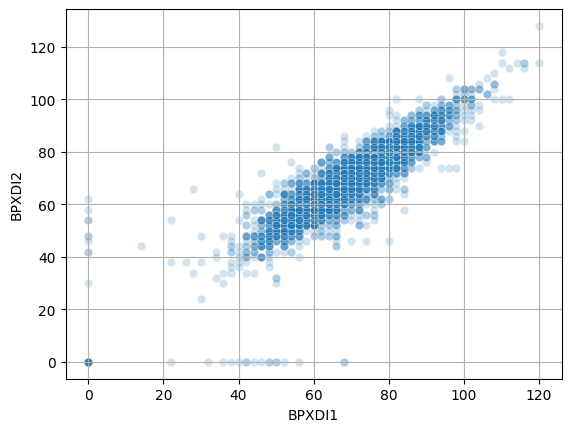

In [2]:
plt.grid(True)
sns.scatterplot(x="BPXDI1", y="BPXDI2", data=da, alpha=0.2);
print(da[["BPXDI1", "BPXDI2"]].corr())
print(da[["BPXSY1", "BPXSY2"]].corr())

__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure compare to the correlation between repeated measurements of systolic blood pressure?

The repated measures of diastolic blood pressure are substantially less correlated than the repeated measures of systolic blood pressure.

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

In [3]:
print(da[["BPXSY1", "BPXDI1"]].corr())
print(da[["BPXSY2", "BPXDI2"]].corr())

          BPXSY1    BPXDI1
BPXSY1  1.000000  0.316531
BPXDI1  0.316531  1.000000
          BPXSY2    BPXDI2
BPXSY2  1.000000  0.303847
BPXDI2  0.303847  1.000000


The correlations between the first systolic/diastolic measures and the second systolic/diastolic measures are similar.

## Question 2

Calculate the correlation coefficient between the first measures of diastolic and systolic blood pressure within each subgroup defined by sex and ethnicity.  Then construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement stratified by sex (rows) and race/ethnicity groups (columns).

                            BPXSY1    BPXDI1
RIAGENDR RIDRETH1                           
1        1        BPXSY1  1.000000  0.302742
                  BPXDI1  0.302742  1.000000
         2        BPXSY1  1.000000  0.306427
                  BPXDI1  0.306427  1.000000
         3        BPXSY1  1.000000  0.207470
                  BPXDI1  0.207470  1.000000
         4        BPXSY1  1.000000  0.423597
                  BPXDI1  0.423597  1.000000
         5        BPXSY1  1.000000  0.370852
                  BPXDI1  0.370852  1.000000
2        1        BPXSY1  1.000000  0.351912
                  BPXDI1  0.351912  1.000000
         2        BPXSY1  1.000000  0.239737
                  BPXDI1  0.239737  1.000000
         3        BPXSY1  1.000000  0.241947
                  BPXDI1  0.241947  1.000000
         4        BPXSY1  1.000000  0.378335
                  BPXDI1  0.378335  1.000000
         5        BPXSY1  1.000000  0.438976
                  BPXDI1  0.438976  1.000000


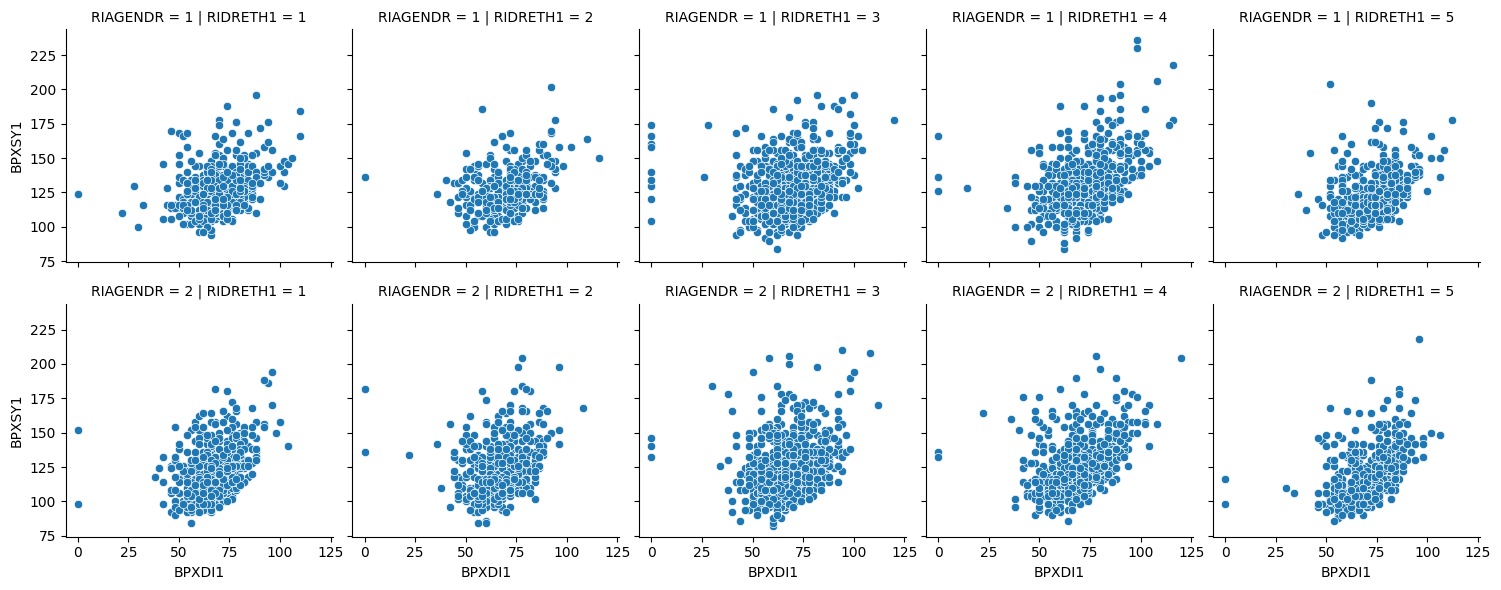

In [4]:
print(da.groupby(["RIAGENDR", "RIDRETH1"])[["BPXSY1", "BPXDI1"]].corr())

g = sns.FacetGrid(da, col="RIDRETH1", row="RIAGENDR")
g.map(sns.scatterplot, "BPXDI1", "BPXSY1")

__Q3a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

There is a positive association between diastolic and systolic blood pressure in all groups.  Ethnic group 5 (other/multiracial) has greater correlation and ethnic group 3 (non-Hispanic white) has lesser correlation.

## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by sex and educational attainment.

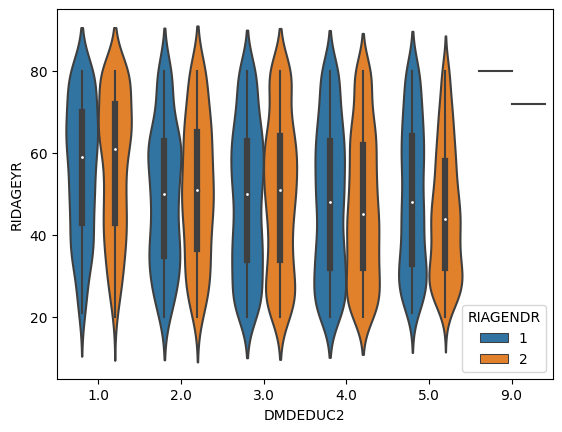

In [5]:
sns.violinplot(data=da, y="RIDAGEYR", x="DMDEDUC2", hue="RIAGENDR");

__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

People who don't know their educational attainment (DMDEDUC2=9) are generally much older compared to other subjects.  People in group 1 (less than 9th grade education) tend to be older and people in group 5 (completed college) tend to be younger.

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

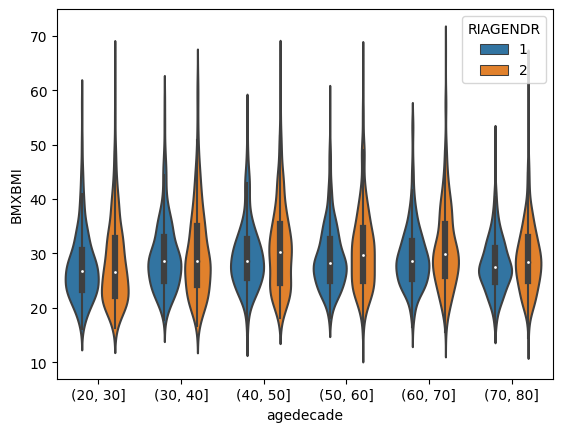

In [9]:
da["agedecade"] = pd.cut(da["RIDAGEYR"], range(20, 90, 10))
sns.violinplot(data=da, y="BMXBMI", x="agedecade", hue="RIAGENDR");

__Q5a.__ Comment on the differences in BMI across the demographic groups.

BMI is right-skewed in all strata, and is slightly higher in age ranges 40-50 and 50-60.  The BMI distributions for females (RIAGENDR=2) are more dispered than the BMI distributions for males (RIAGENDR=1). 

## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [7]:
c = da.groupby(["RIDRETH1", "HIQ210"]).size().unstack()
print(c.divide(c.sum(1), axis=0))

HIQ210         1.0       2.0       9.0
RIDRETH1                              
1         0.137982  0.857567  0.004451
2         0.128696  0.871304       NaN
3         0.067354  0.931432  0.001214
4         0.108654  0.890385  0.000962
5         0.081761  0.915723  0.002516


__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?

Group 1 (Mexican American) has the highest rate of having no insurance in the last year.